In [ ]:
# como vimos anteriormente, si tenemos masas muy chiquitas el agujero negro desaparece. entonces, nos
# pondremos a resolver la ecuacion diferencial para masas grandes y sin considerar la contribucion de
# la radiacion de hawking 

In [2]:
from astropy import constants as ast
from astropy import units as u

m_sol = ast.M_sun.cgs.value   # masa del sol en gramos
G = ast.G.cgs.value           #constante de gravitacion universal en cgs
c = ast.c.cgs.value           #velocidad de la luz en cgs

m_sol

1.988409870698051e+33

In [3]:
from scipy import constants as sci
from scipy.constants import physical_constants

#cargamos las constantes que vayamos a usar en el calculo
t_planck = physical_constants["Planck time"][0]
pi = sci.pi

masa_planck = physical_constants["Planck mass"][0]
m_planck = masa_planck*(10**3) #masa de planck en gramos


In [4]:
#definimos nuestras constantes 
#m_0 = m_sol*10**4              # la masa en el momento en que se produce el bounce
x_b = 9*10**37                 # constante adimensional que me define a a_b con x_b < 10^38 
a_b = 1/x_b                     # constante del bounce
T_b = t_planck*10**25          # 10^3 < T_b / t_planck < 10^40 [s]    asi que elijo uno intermedio
lamb = 1.1056*10**(-56)        # constante cosmologica en cm^-2 
rho_0 = (lamb*c**2)/(8*pi*G)   # densidad de "hoy" en cgs. consideramos la densidad de vacio, que es la que domina

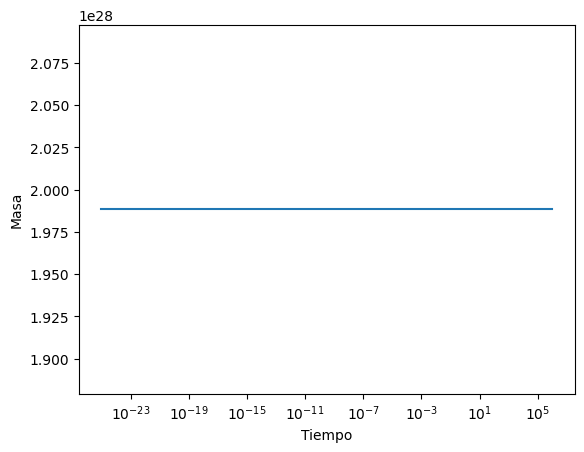

el programa tardo 0.8989551067352295 en ejecutarse


In [5]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import time

t_corrida_i = time.time()

# nuevamente defino el modelo, que en este caso son las dos contribuciones 

def model(M, t): 
    w = 1/3
    aux = 1+3*w*c**2
    A = (aux**(aux/(2*w*c**2)))/(4*w**(3/2)*c**3)
    rho = rho_0*a_b*(1+(t/T_b)**2)**(1/(3-3*w))
    P = w*(c**2)*rho
    
    m_0 = 10**(-19)*m_sol # la masa que tiene el bh en el momento del bounce
    
    dot_M_b = m_0*((2*a_b*t)/(3*(1-w)*T_b))*(1+(t/T_b)**2)**((-2-3*w)/(3*(1-w))) 
    dot_M_ac = 4*pi*A*G**2*c**(-5)*M**2*(c**2*rho-P)
    
    dMdt = dot_M_b + dot_M_ac
    
    return dMdt 


# mi condicion inicial es un rango de masas, de modo que 
masas = np.logspace(np.log10(10**(-19)*m_sol), np.log10(m_sol*10**6), 5) #usamos 10^-19 pues vemos de antes que ya no se evapora 
masas_norm = (masas - np.min(masas))/ (np.max(masas) - np.min(masas))

M_0 = 10**(-5)*m_sol # la masa inicial


# los tiempos 
t = np.logspace(np.log10(10**-25), np.log10(10**6), 25)
t_norm = (t - np.min(t))/ (np.max(t) - np.min(t))

# solve ODE
M = odeint(model,M_0,t_norm)


plt.plot(t, M)

plt.xlabel('Tiempo')
plt.ylabel('Masa')
#plt.yscale('log')
plt.xscale('log')
plt.show()

t_corrida_f = time.time()

t_total = t_corrida_f-t_corrida_i

print(f'el programa tardo {t_total} en ejecutarse')


In [24]:
masas = np.logspace(np.log10(10**(-19)*m_sol), np.log10(m_sol*10**6), 7) #usamos 10^-19 pues vemos de antes que ya no se evapora 
masas_norm = (masas - np.min(masas))/ (np.max(masas) - np.min(masas))

masas_norm

array([0.00000000e+00, 1.46769927e-19, 2.15443468e-15, 3.16227766e-11,
       4.64158883e-07, 6.81292069e-03, 1.00000000e+02])

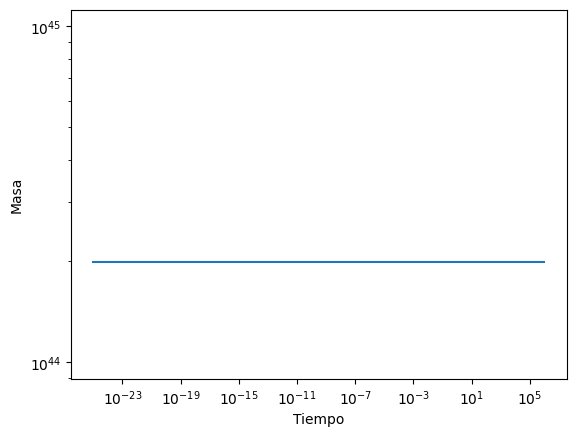

In [19]:
import numpy as np
from scipy.integrate import solve_ivp, RK45
import matplotlib.pyplot as plt

# nuevamente defino el modelo, que en este caso son las dos contribuciones 

def model(M, t, m_0):
    
    #normalizar estos valores 
    
    
    w = 1/3
    aux = 1+3*w*c**2
    A = (aux**(aux/(2*w*c**2)))/(4*w**(3/2)*c**3)
    rho = rho_0*a_b*(1+(t/T_b)**2)**(1/(3-3*w))
    P = w*(c**2)*rho
    
    dot_M_b = m_0*((2*a_b*t)/(3*(1-w)*T_b))*(1+(t/T_b)**2)**((-2-3*w)/(3*(1-w))) 
    dot_M_ac = 4*pi*A*G**2*c**(-5)*M**2*(c**2*rho-P)
    
    dMdt = dot_M_b + dot_M_ac
    
    return dMdt 

# mi condicion inicial es un rango de masas, de modo que 
masas = np.logspace(np.log10(10**(-19)*m_sol), np.log10(m_sol*10**6), 5) #usamos 10^-19 pues vemos de antes que ya no se evapora 
masas_norm = (masas - np.min(masas))/ (np.max(masas) - np.min(masas))







M_0 = m_sol*10e10 # la masa inicial

t = np.logspace(np.log10(10**-25), np.log10(10**6), 1000)

t_neg = -t

sol = solve_ivp(model, (t[0], t[-1]), [M_0], method='BDF', rtol=1e-6, atol=1e-6, t_eval=t_neg)

tiempo = sol.t
Masa = sol.y[0]
        
plt.plot(sol.t, Masa)

plt.xlabel('Tiempo')
plt.ylabel('Masa')
plt.yscale('log')
plt.xscale('log')
plt.show()


In [ ]:
#pruebo solo con cada contribucion 

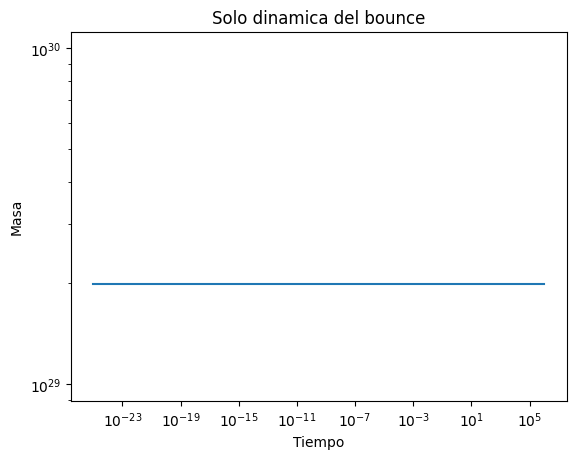

In [9]:

def model(M, t): 
    w = 1/3
    
    m_0 = 10**(-19)*m_sol # la masa que tiene el bh en el momento del bounce
    
    dot_M_b = m_0*((2*a_b*t)/(3*(1-w)*T_b))*(1+(t/T_b)**2)**((-2-3*w)/(3*(1-w))) 
    
    dMdt = dot_M_b 
    
    return dMdt 

M_0 = m_sol*10e-5 # la masa inicial

t = np.logspace(np.log10(10**-25), np.log10(10**6), 1000)

sol = solve_ivp(model, (t[0], t[-1]), [M_0], method='BDF', rtol=1e-6, atol=1e-6, t_eval=t)

tiempo = sol.t
Masa = sol.y[0]
        
plt.plot(sol.t, Masa)

plt.title('Solo dinamica del bounce')

plt.xlabel('Tiempo')
plt.ylabel('Masa')
plt.yscale('log')
plt.xscale('log')
plt.show()

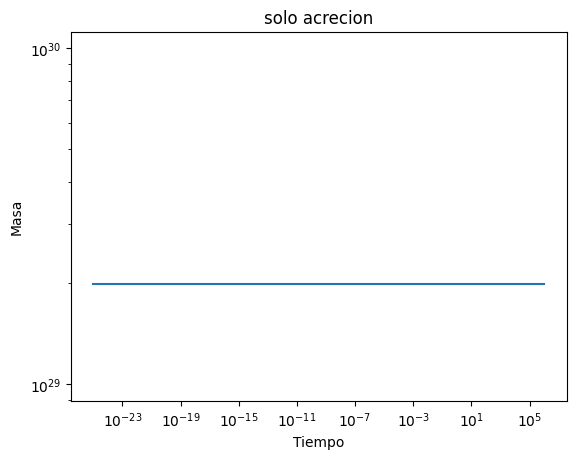

In [10]:


def model(M, t): 
    w = 1/3
    aux = 1+3*w*c**2
    A = (aux**(aux/(2*w*c**2)))/(4*w**(3/2)*c**3)
    rho = rho_0*a_b*(1+(t/T_b)**2)**(1/(3-3*w))
    P = w*(c**2)*rho
    

    dot_M_ac = 4*pi*A*G**2*c**(-5)*M**2*(c**2*rho-P)
    
    dMdt = dot_M_ac
    
    return dMdt 

M_0 = m_sol*10e-5 # la masa inicial

t = np.logspace(np.log10(10**-25), np.log10(10**6), 1000)

sol = solve_ivp(model, (t[0], t[-1]), [M_0], method='BDF', rtol=1e-6, atol=1e-6, t_eval=t)

tiempo = sol.t
Masa = sol.y[0]
        
plt.plot(sol.t, Masa)

plt.title('solo acrecion')

plt.xlabel('Tiempo')
plt.ylabel('Masa')
plt.yscale('log')
plt.xscale('log')
plt.show()

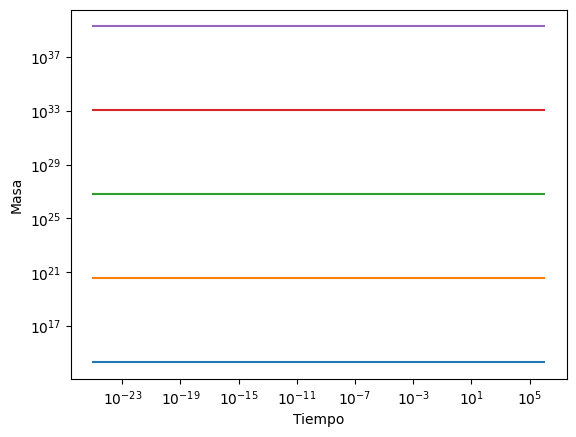

In [17]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# nuevamente defino el modelo, que en este caso son las dos contribuciones 

def model(M, t): 
    w = 1/3
    aux = 1+3*w*c**2
    A = (aux**(aux/(2*w*c**2)))/(4*w**(3/2)*c**3)
    rho = rho_0*a_b*(1+(t/T_b)**2)**(1/(3-3*w))
    P = w*(c**2)*rho
    
    dot_M_b = m_0*((2*a_b*t)/(3*(1-w)*T_b))*(1+(t/T_b)**2)**((-2-3*w)/(3*(1-w))) 
    dot_M_ac = 4*pi*A*G**2*c**(-5)*M**2*(c**2*rho-P)
    
    dMdt = dot_M_b + dot_M_ac
    
    return dMdt 


# mi condicion inicial es un rango de masas, de modo que 
masas = np.logspace(np.log10(10**(-19)*m_sol), np.log10(m_sol*10**6), 5) #usamos 10^-19 pues vemos de antes que ya no se evapora 
masas_norm = (masas - np.min(masas))/ (np.max(masas) - np.min(masas))


# los tiempos 
t = np.logspace(np.log10(10**-25), np.log10(10**6), 25)
t_norm = (t - np.min(t))/ (np.max(t) - np.min(t))

resultados = []

for m_0 in masas:
    M = odeint(model, m_0, t)
    resultados.append(M)

plt.figure() 
for M in resultados:
    plt.plot(t, M)

plt.xlabel('Tiempo')
plt.ylabel('Masa')
plt.yscale('log')
plt.xscale('log')
plt.show()


estoy probando
[4.09802092e-31]
estoy probando
[4.10781247e-31]
estoy probando
[4.11760402e-31]
estoy probando
[1.02033107e-29]
estoy probando
[1.9994861e-29]
estoy probando
[2.97864113e-29]
estoy probando
[1.27701914e-28]
estoy probando
[2.25617414e-28]
estoy probando
[3.2353291e-28]
estoy probando
[1.30268727e-27]
estoy probando
[2.28183933e-27]
estoy probando
[3.26098736e-27]
estoy probando
[1.3051865e-26]
estoy probando
[2.28404357e-26]
estoy probando
[3.26249702e-26]
estoy probando
[1.2987036e-25]
estoy probando
[2.24850383e-25]
estoy probando
[3.15982135e-25]
estoy probando
[8.33073846e-25]
estoy probando
[7.67485199e-25]
estoy probando
[5.74909154e-25]
estoy probando
[6.06479311e-26]
estoy probando
[2.03737195e-26]
estoy probando
[1.00542968e-26]
estoy probando
[6.32445772e-28]
estoy probando
[2.06572644e-28]
estoy probando
[1.01227836e-28]
estoy probando
[6.32714731e-30]
estoy probando
[2.06601326e-30]
estoy probando
[1.01234722e-30]
estoy probando
[6.32717419e-32]
estoy proban

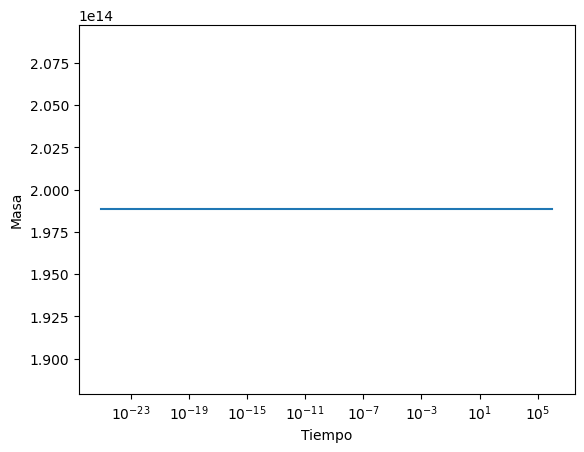

In [9]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# nuevamente defino el modelo, que en este caso son las dos contribuciones 

def model(M, t): 
    w = 1/3
    aux = 1+3*w*c**2
    A = (aux**(aux/(2*w*c**2)))/(4*w**(3/2)*c**3)
    rho = rho_0*a_b*(1+(t/T_b)**2)**(1/(3-3*w))
    P = w*(c**2)*rho
    
    dot_M_b = m_0*((2*a_b*t)/(3*(1-w)*T_b))*(1+(t/T_b)**2)**((-2-3*w)/(3*(1-w))) 
    dot_M_ac = 4*pi*A*G**2*c**(-5)*M**2*(c**2*rho-P)
    
    dMdt = dot_M_b + dot_M_ac
    print("estoy probando")
    print(dMdt)
    
    return dMdt 


# mi condicion inicial es un rango de masas, de modo que 
m_0 =10**(-19)*m_sol 

# los tiempos 
t = np.logspace(np.log10(10**-25), np.log10(10**6), 25)

# solve ODE
M = odeint(model,m_0,t)

print(M)

plt.plot(t, M)

plt.xlabel('Tiempo')
plt.ylabel('Masa')
#plt.yscale('log')
plt.xscale('log')
plt.show()


In [51]:
t = np.linspace(-10e6, 10e6, 1000)

t

array([-10000000.        ,  -9979979.97997998,  -9959959.95995996,
        -9939939.93993994,  -9919919.91991992,  -9899899.8998999 ,
        -9879879.87987988,  -9859859.85985986,  -9839839.83983984,
        -9819819.81981982,  -9799799.7997998 ,  -9779779.77977978,
        -9759759.75975976,  -9739739.73973974,  -9719719.71971972,
        -9699699.6996997 ,  -9679679.67967968,  -9659659.65965966,
        -9639639.63963964,  -9619619.61961962,  -9599599.5995996 ,
        -9579579.57957958,  -9559559.55955956,  -9539539.53953954,
        -9519519.51951952,  -9499499.4994995 ,  -9479479.47947948,
        -9459459.45945946,  -9439439.43943944,  -9419419.41941942,
        -9399399.3993994 ,  -9379379.37937938,  -9359359.35935936,
        -9339339.33933934,  -9319319.31931932,  -9299299.2992993 ,
        -9279279.27927928,  -9259259.25925926,  -9239239.23923924,
        -9219219.21921922,  -9199199.1991992 ,  -9179179.17917918,
        -9159159.15915916,  -9139139.13913914,  -9119119.11911

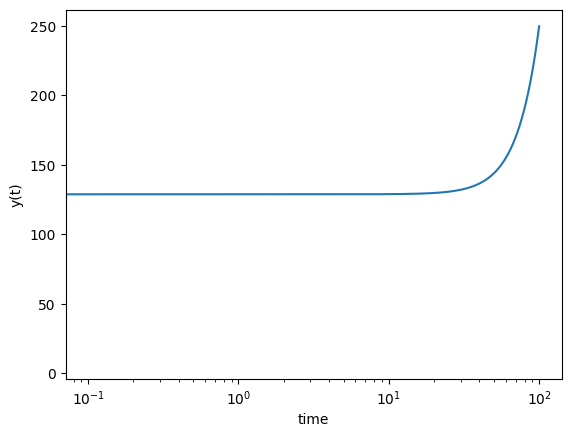

In [50]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

#mi ecuacion es dM/dt = dot M_b + dot M_ac

# function that returns dy/dt
def model(M,t):
    
    m_0 = 4
    a_b = 6
    w = 1/3
    T_b = 10
    pi = 3.14
    A = 5/2
    G = 6.67
    c = 300
    rho = 7
    P = 9
    
    dot_M_ac = 4*pi*A*G**2*c**(-5)*M**2*(c**2*rho-P)
    
    dMdt = dot_M_ac
    return dMdt

# initial condition
y0 = 8

# time points
t = np.linspace(-100, 100, 1000)

# solve ODE
sol = solve_ivp(model, [t[0], t[-1]], [y0], method='RK45', t_eval=t)

t = sol.t
y = sol.y[0]

# plot results
plt.plot(t,y)
plt.xlabel('time')
plt.ylabel('y(t)')
plt.xscale('log')
#plt.yscale('log')
plt.show()

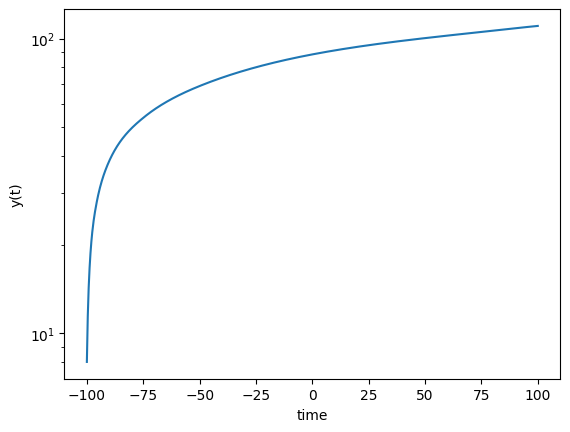

In [30]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

#mi ecuacion es dM/dt = dot M_b + dot M_ac

# function that returns dy/dt
def model(M,t):
    
    m_0 = 4
    a_b = 6
    w = 1/3
    T_b = 10
    pi = 3.14
    A = 5/2
    G = 6.67
    c = 300
    rho = 7
    P = 9
    
    dot_M_b = m_0*((2*a_b*t)/(3*(1-w)*T_b))*(1+(t/T_b)**2)**((-2-3*w)/(3*(1-w))) 
    
    dMdt = dot_M_b 
    return dMdt

# initial condition
y0 = 8

# time points
t = np.linspace(-100, 100, 1000)

# solve ODE
sol = solve_ivp(model, [t[0], t[-1]], [y0], method='RK45', t_eval=t)

t = sol.t
y = sol.y[0]

# plot results
plt.plot(t,y)
plt.xlabel('time')
plt.ylabel('y(t)')

plt.yscale('log')
plt.show()

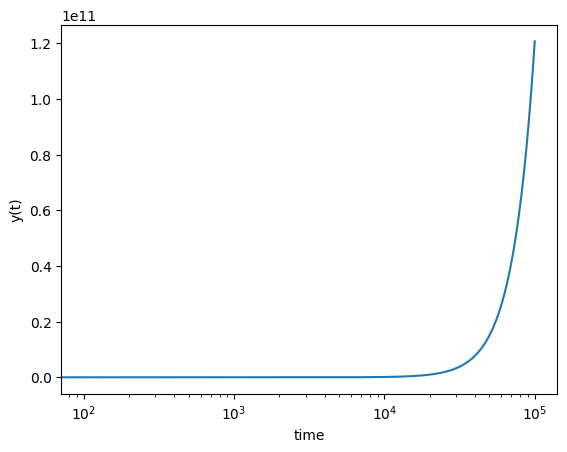

In [16]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

#mi ecuacion es dM/dt = dot M_b + dot M_ac

# function that returns dy/dt
def model(M,t):
    
    m_0 = 4
    a_b = 6
    w = 1/3
    T_b = 10
    pi = 3.14
    A = 5/2
    G = 6.67
    c = 300
    rho = 7
    P = 9
    
    dot_M_b = m_0*((2*a_b*t)/(3*(1-w)*T_b))*(1+(t/T_b)**2)**((-2-3*w)/(3*(1-w))) 
    dot_M_ac = 4*pi*A*G**2*c**(-5)*M**2*(c**2*rho-P)
    
    dMdt = dot_M_b + dot_M_ac
    return dMdt

# initial condition
y0 = 8

# time points
t = np.linspace(0, 10e4, 1000)

# solve ODE
sol = solve_ivp(model, [t[0], t[-1]], [y0], method='RK45', t_eval=t)

t = sol.t
y = sol.y[0]

# plot results
plt.plot(t,y)
plt.xlabel('time')
plt.ylabel('y(t)')
plt.xscale('log')
#plt.yscale('log')
plt.show()

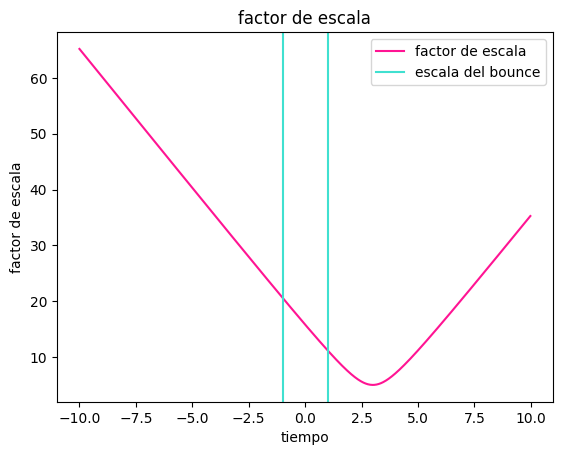

In [49]:
import matplotlib.pyplot as plt 
import numpy as np

t = np.linspace(-10, 10, 1000, endpoint=False)

mov = 3

T_b = 2 - mov
a_b = 5
w = 1/3

a_t = a_b * (1+((t-mov)/T_b)**2)**(1/(3-3*w))

min = np.min(a_t)


plt.xlabel('tiempo')
plt.ylabel('factor de escala')

#plt.xlim([-10**-15, 10**-15])

#plt.yscale('log')  
#plt.xscale('log')


plt.plot(t, a_t, label = "factor de escala", color='deeppink')
plt.axvline(x = T_b, color = 'turquoise', label = 'escala del bounce')
plt.axvline(x = -T_b, color = 'turquoise')
plt.legend()
plt.title('factor de escala')
plt.savefig('factor_escala.png')